<a href="https://colab.research.google.com/github/mohadi21/Detection-des-marches-d-un-escalier-sur-une-image/blob/main/TP_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

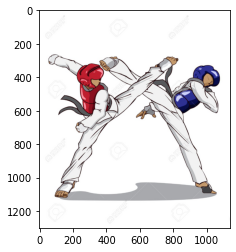

(1300, 1137, 3)


In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import imageio

imgA = imageio.imread("/content/azt.jpg")

#print(imgA)
plt.imshow(imgA)
plt.show()
print(imgA.shape)

In [2]:
#rouge=img_originale[:,:,0]
#vert=img_originale[:,:,1]
#bleu=img_originale[:,:,2]

#data=(0.299*rouge+0.587*vert+0.144*bleu)
#plt.imshow(data,cmap='gray')
data=np.array(imgA[:,:,0],dtype=np.float64)
T=data.shape
#print(data)

def rgb2grey(img):
    return np.dot(img[...,:3],[0.299,0.587,0.144])
img_gris = rgb2grey(img_originale)
plt.imshow(img_gris, cmap= plt.get_cmap("gray"))
plt.show()

def matriceImage(matrice,gamma,rgb):
    s = matrice.shape
    a = 1.0/gamma
    norm = matrice.max()
    m = np.power(matrice/norm,a)
    im = np.zeros((s[0],s[1],3),dtype=float64)
    im[:,:,0] = rgb[0]*m;
    im[:,:,1] = rgb[1]*m;
    im[:,:,2] = rgb[2]*m;
    
    return im;


In [3]:
def matriceImageLog(matrice,rgb):
    s = matrice.shape
    m = np.log10(1+matrice)
    min = m.min()
    max = m.max()
    m = (m-min)/(max-min)
    im = np.zeros((s[0],s[1],3),dtype=float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im



def plotSpectre(image,Lx,Ly):
    (Ny,Nx,p) = image.shape
    fxm = Nx*1.0/(2*Lx)
    fym = Ny*1.0/(2*Ly)
    imshow(image,extent=[-fxm,fxm,-fym,fym])
    xlabel("fx")
    ylabel("fy")      
    
    
def matriceImage(matrice,gamma,rgb):
    s = matrice.shape
    a=1.0/gamma;
    norm=matrice.max()
    m = np.power(matrice/norm,a)
    im = np.zeros((s[0],s[1],3),dtype=float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im
                

(1300, 1137)


Text(0.5, 1.0, 'spectre de l image  sans log')

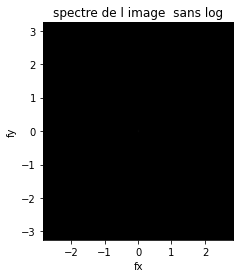

In [4]:
V=fft2(data)
VC = fftshift(V)
P = np.power(np.absolute(VC),2)
print(P.shape)
img = matriceImage(P,2.0,[1.0,1.0,1.0])
#img=matriceImageLog(P,[1.0,0.0,0.0])
plotSpectre(img,200.0,200.0)
plt.title('spectre de l image  sans log')


Text(0.5, 1.0, 'spectre de l image  avec log')

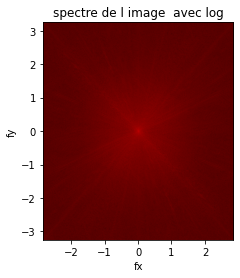

In [5]:
img=matriceImageLog(P,[1.0,0.0,0.0])
plotSpectre(img,200.0,200.0)
plt.title('spectre de l image  avec log')

# Filtre Moyenneur

In [6]:
#en fonction 
def filtre(data,H,CH):
    PF=np.zeros(data.shape)
    PF[0,:]=data[0,:]
    PF[-1,:]=data[-1,:]
    PF[:,0]=data[:,0]
    PF[:,1]=data[:,1]
    PF[:,-1]=data[:,-1]
    PF[:,-2]=data[:,-2]
    T=data.shape
    for i in range(T[0]-1):
      if(i==0):
            i=i+1
            
      for j in range(T[1]-2):
        if j==0 or j==1:
            j=j+1
        else :
            a=(sum(CH*data[i,j]+data[i,j-1]*H[1,1]+data[i,j-2]*H[1,0]+data[i,j+1]*H[1,3]+data[i,j+2]*H[1,4]+H[0,0]*data[i-1,j-2]+H[0,1]*data[i-1,j-1]+H[0,2]*data[i-1,j]+H[0,3]*data[i-1,j+1]+H[0,4]*data[i-1,j+2]+H[2,0]*data[i+1,j-2]+H[2,1]*data[i+1,j-1]+H[2,2]*data[i+1,j]+H[2,3]*data[i+1,j+1]+H[2,4]*data[i+1,j+2])/7)  
           
            #print(round(a))
            PF[i,j]=round(a)
    return PF       

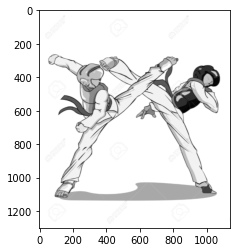

In [7]:
H=np.array([[0,1,0,1,0]
           ,[1,0,1,0,1]
           ,[0,1,0,1,0]])
CH=H[1,2]
PF=filtre(data,H,CH)
plt.imshow(PF,cmap='gray')

# Detection de contour par Sobel

In [8]:
#sobel
def sobel(PF,s):
    Sx=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    Gx=np.zeros(data.shape)
    Gy=np.zeros(data.shape)
    G=np.ones(data.shape)
    Sy=Sx.T
    l=T[0]-1
    m=T[1]-1
    #s=20
    PS=PF
    Gx=PS
    Gy=PS

    i=2
    #calcule de GX et GY
    while(i<l):
        j=2
        while(j<m):

            a=sum(PF[i-1:i+2,j-1:j+2]*Sx)
            Gx[i-1][j-1]=a

            b=sum(PF[i-1:i+2,j-1:j+2]*Sy)
            Gy[i-1][j-1]=b
            j=j+1
        i=i+1    
    #calcule  de G        
    for i in range(l+1):
        for j in range(m+1):
            G[i,j]=max(Gx[i,j],Gy[i,j])
    print(G)

    G[G<=s]=0
    G[G>s]=1


    
    plt.imshow(G,cmap='gray')
    #plt.title('contour avec',s,'seuil'  )
    plt.show()




[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


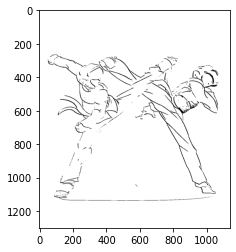

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


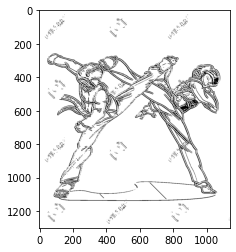

In [9]:
sobel(PF,0)
sobel(PF,40)



# Detection de contours Morphologique



In [10]:
def morphologique(img,seuil): #GX   GY
    img_morphologique=np.zeros(data.shape)
    i=1
    while i < T[0]-1:
        j=2
        while j < T[1]-2:
            img_morphologique[i][j] = ( (img[i-1:i+2,j-2:j+3]*H).max() - mn(img[i-1:i+2,j-2:j+3]) ) / 2 
            j+=1
        i=i+1
    
    img_morphologique[img_morphologique<=seuil]=0
    img_morphologique[img_morphologique>seuil]=1
    
    plt.title('filtre morphologie')
    plt.imshow(img_morphologique,cmap='gray')
    plt.show()

In [12]:
#pour calculer le min (Es)
def mn(h):
    m=300
    k=0
    for i in range(3):
            for j in range(5):
                if k % 2 != 0 :
                    if m > h[i, j] :
                        m = h[i, j]
                k+=1
    return m

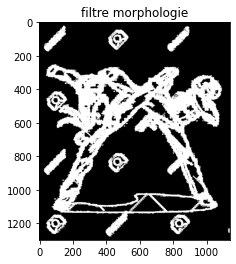

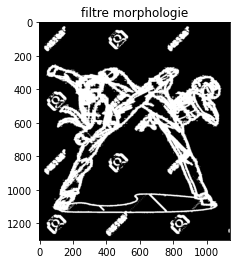

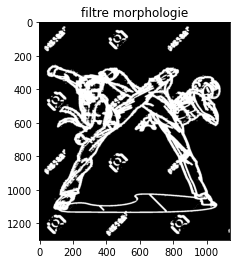

In [13]:
morphologique(PF,20)
morphologique(PF,40)
morphologique(PF,60)

# masque de Gauss

In [14]:
filtre_gausse = np.zeros((3, 5))
o=0.9;#-->sigma
i=-1
while i < 2 :
    j = -2
    while j < 3 :
        filtre_gausse [i+1][j+2] = (1/((2*np.pi)**0.5*o))*np.exp(-(i**2+j**2)/(2*o**2))
        j=j+1
    i=i+1
print (filtre_gausse)
filtre_gausse = filtre_gausse / filtre_gausse.sum()

[[0.02024196 0.12897381 0.23910273 0.12897381 0.02024196]
 [0.03752628 0.23910273 0.4432692  0.23910273 0.03752628]
 [0.02024196 0.12897381 0.23910273 0.12897381 0.02024196]]


# filtre de Gauss

In [15]:
def gauss (img, H):
    img_gauss=np.zeros(data.shape)
    i=1
    while i < T[0]-1:
        j=2
        while j < T[1]-2:
            a = sum(img[i-1:i+2,j-2:j+3]*H)
            img_gauss[i-1][j-2]=a
            j+=1
        i+=1
    A = img_gauss.astype(int)  
    plt.title('image avec filtre de gauss')
    plt.imshow(A,cmap='gray')
    plt.show()
    return A
#PG:image amelioré par gauss

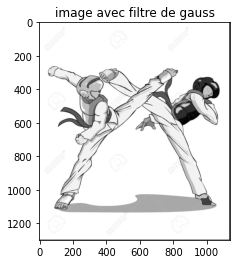

In [16]:
PG=gauss(data,filtre_gausse)

# application de filtre de sobel sur l'image amelioré par Gauss

[[ 255.  255.  255. ...    0.    0.    0.]
 [ 255.  255.  255. ...    0.    0.    0.]
 [ 255.  255.  255. ...    0.    0.    0.]
 ...
 [ 255. 1275. 1275. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


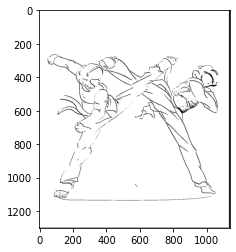

[[ 255.  255.  255. ...    0.    0.    0.]
 [ 255.  255.  255. ...    0.    0.    0.]
 [ 255.  255.  255. ...    0.    0.    0.]
 ...
 [ 255. 6375. 6375. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


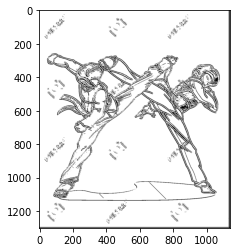

In [17]:
sobel(PG,0)
sobel(PG,20)

# application de gradient morphologique sur l'image amelioré par Gauss


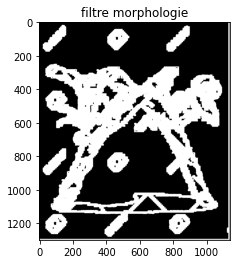

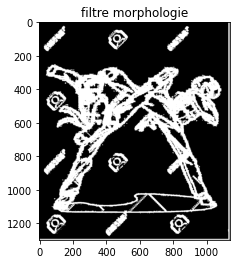

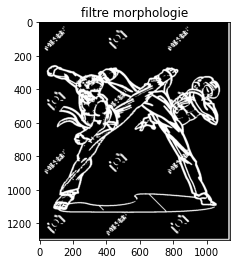

In [18]:
morphologique(PG,0)
morphologique(PG,40)
morphologique(PG,230)